# Exploratory Data Analysis

In this notebook I will explore the dataset and try to find meaningful insights. I will also look for relationships between variables to help in the machine learning process.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv("train.csv")

# preview data
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,City Hotel,0,3.044522,0,1.098612,1,0.0,0,BB,IRL,...,No Deposit,195.0,0,Transient,98.0,0,0,Check-Out,2017-02-09,2017-02-07
1,City Hotel,0,2.197225,0,1.386294,2,0.0,0,BB,FRA,...,No Deposit,missing,0,Transient-Party,100.0,0,0,Check-Out,2016-03-12,2016-03-09
2,City Hotel,1,4.543295,0,1.386294,2,0.0,0,BB,PRT,...,Non Refund,170.0,0,Transient,95.0,0,0,Canceled,2017-01-03,2017-04-06
3,Resort Hotel,0,4.510860,4,2.397895,2,0.0,0,BB,GBR,...,No Deposit,2.0,0,Contract,54.0,0,0,Check-Out,2015-10-07,2015-09-23
4,City Hotel,0,2.197225,0,0.693147,1,0.0,0,BB,ESP,...,No Deposit,missing,0,Transient,80.0,0,0,Check-Out,2017-08-10,2017-08-09


# 1 Questions

Now I will ask and answer some questions about the dataset in an attempt to gain some useful information.

### Question 1: What are the highest and lowest countries when it comes to the proportion of bookings canceled?

To answer this question I will first find the proportion of bookings canceled and then find which proportions are 1 or 0.

In [55]:
# find proportions of cancelations

# group data by country
group = df.groupby("country")

# find proportions
proportions = dict(group["is_canceled"].sum() / group["is_canceled"].count())

In [56]:
# print countries with over %99 cancelation rates
print("Countries with more than %99 cancelations")
countries_with_cancel = []
for key, val in proportions.items():
    if val > 0.99:
        countries_with_cancel.append(key)
        
print(countries_with_cancel)

Countries with more than %99 cancelations
['BEN', 'FJI', 'GGY', 'GLP', 'HND', 'IMN', 'JEY', 'KHM', 'MYT', 'NIC', 'TJK', 'UMI', 'VGB']


In [58]:
# print countries with less than %1 cancelation rates
print("Countries with less then %1 cancelations")
countries_with_no_cancel = []
for key, val in proportions.items():
    if val <= 0.1:
        countries_with_no_cancel.append(key)
        
print(countries_with_no_cancel)

Countries with less then %1 cancelations
['ABW', 'AIA', 'ASM', 'ATA', 'ATF', 'BFA', 'BHS', 'BOL', 'BRB', 'CAF', 'CMR', 'COM', 'CRI', 'CUB', 'CYM', 'DJI', 'DMA', 'GTM', 'IRQ', 'ISL', 'JAM', 'KNA', 'LAO', 'LBY', 'LIE', 'LKA', 'LTU', 'MCO', 'MDG', 'MLI', 'MMR', 'MRT', 'MWI', 'MYS', 'NAM', 'NCL', 'NPL', 'NZL', 'PAN', 'PLW', 'PRY', 'PYF', 'RWA', 'SDN', 'SLE', 'SLV', 'SMR', 'SRB', 'STP', 'SUR', 'SYR', 'TGO', 'UGA']


I will further illustrate with a bar graph to show the cancelation proportions for each country

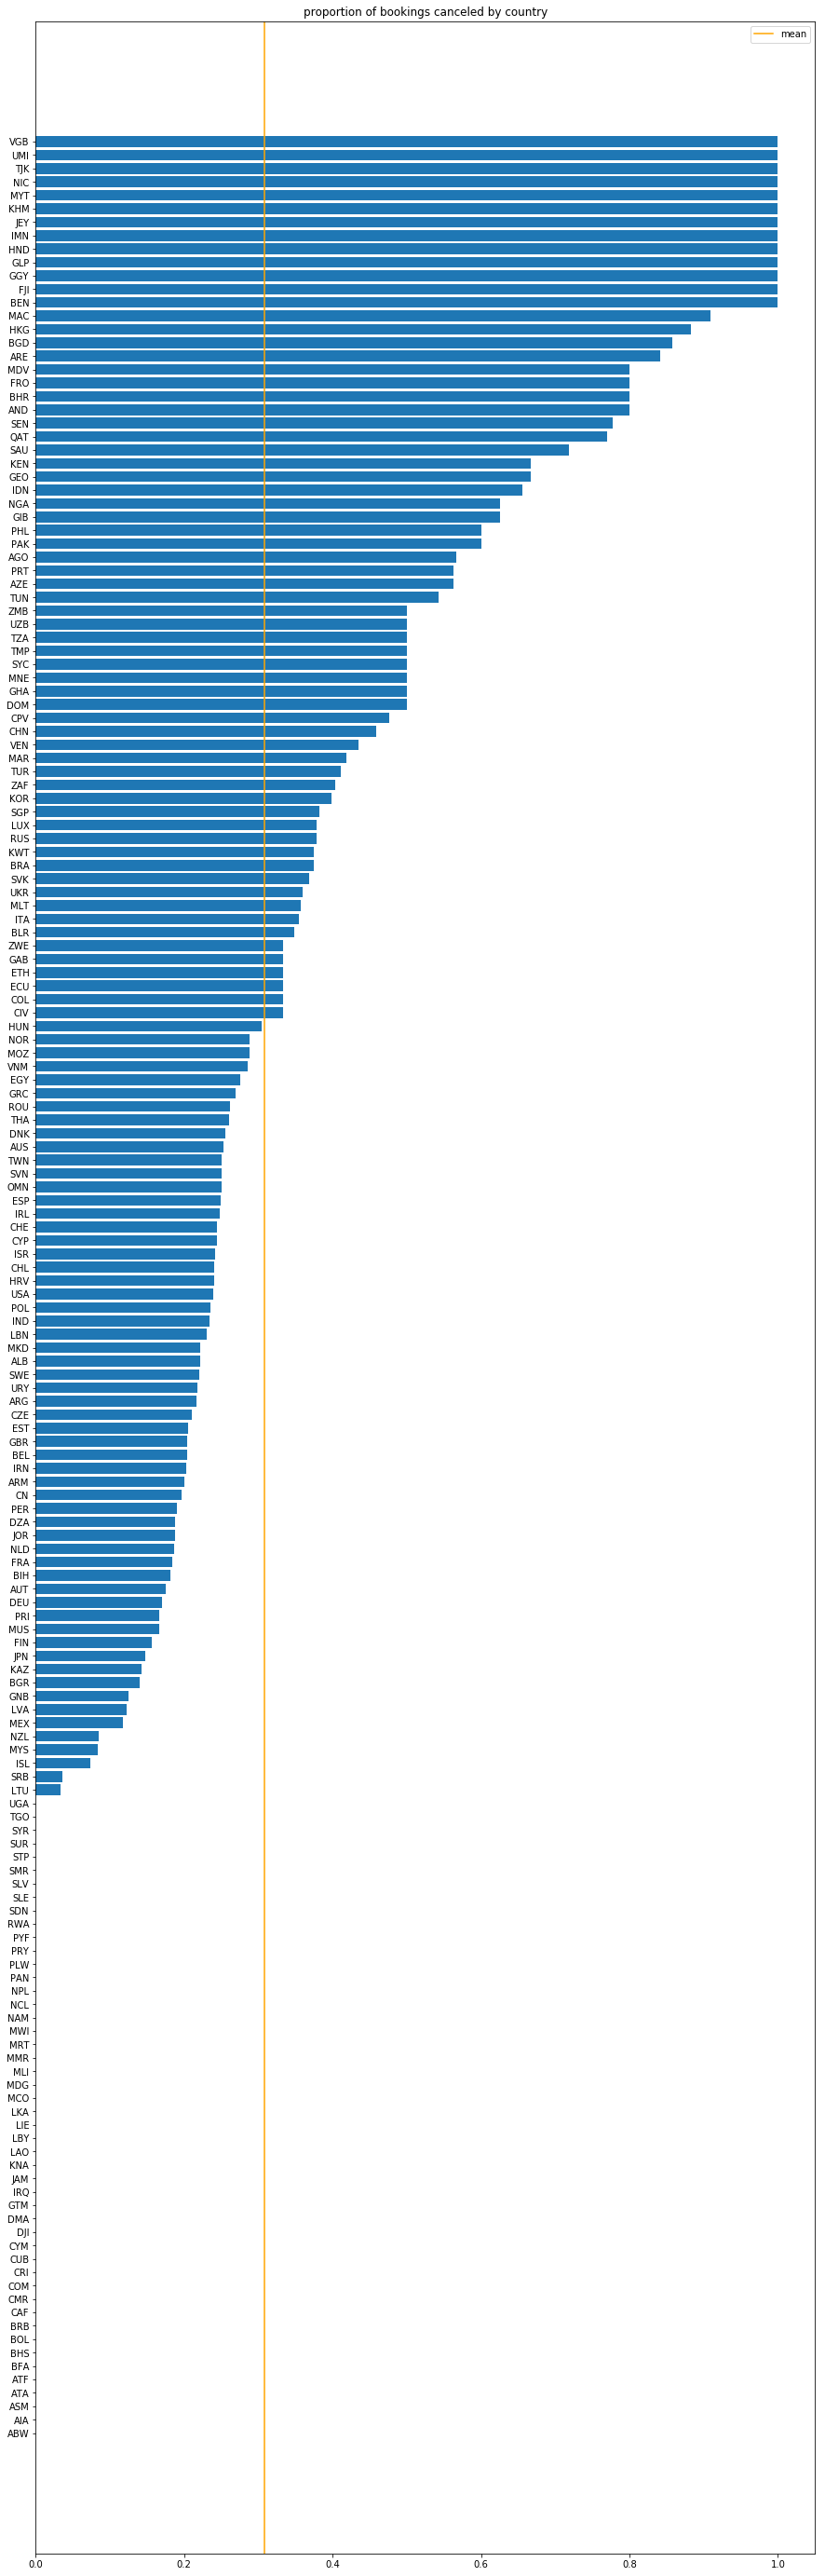

In [59]:
# get proportions
proportions = proportions.items()

# sort the proportions
proportions = sorted(proportions, key=lambda x: x[1])

# get country names
names = [x[0] for x in proportions]

# get proportion values
values = [x[1] for x in proportions]

# plot
plt.figure(figsize=(15, 50))
plt.barh(names, values)
plt.axvline(np.mean(values), label="mean", color="orange")
plt.legend()
plt.title("proportion of bookings canceled by country")
plt.show()

# 2 Variable Relationships

Now I will look at how the variables relate to one another. I will select some columns of interest, then I will make a scatter matrix. Lastly I will make a pair plot to see how the columns relate to the target variable.

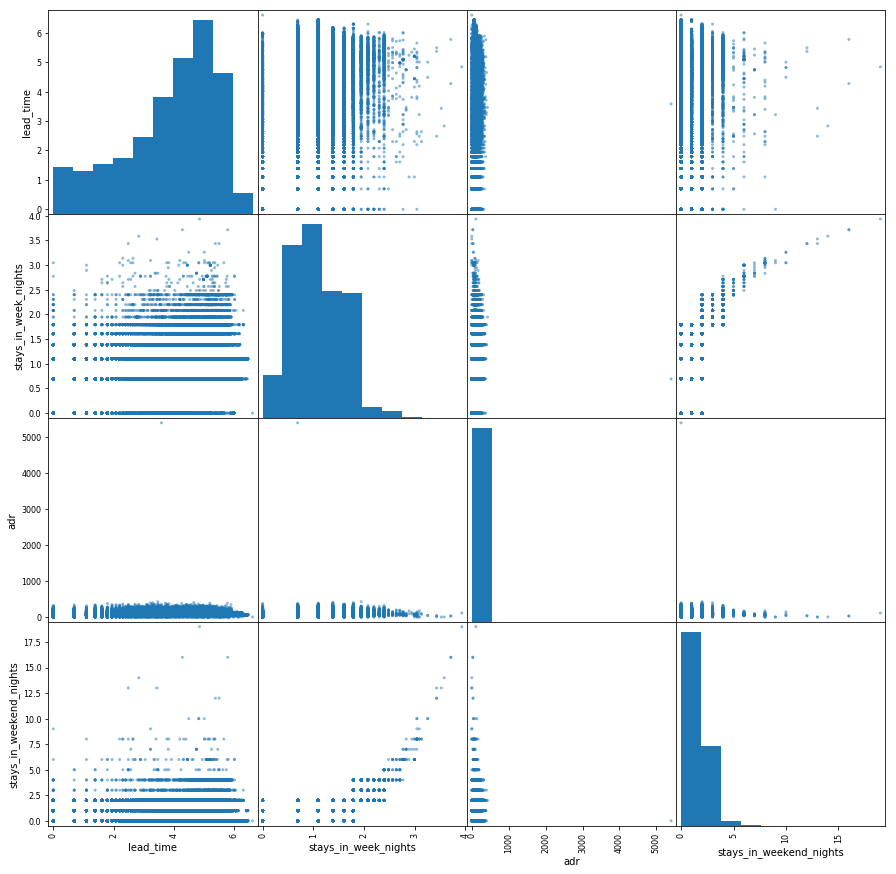

In [77]:
# get numerical columns
numerical_cols = [x for x in df.columns if ((df[x].dtype == int) | (df[x].dtype == float)) & (df[x].nunique() > 5)]
numerical_cols.append('stays_in_weekend_nights')
# scatter matrix (sample dataframe)
pd.plotting.scatter_matrix(df.sample(frac=0.5)[numerical_cols], figsize=(15, 15));

It does not look like there are any relationships between variables, except stays_in_weekends and stays_in_week_days, which would be expected. Now I will if there are any 3-way relationships between variables involving the target variable.

C:\Users\zasz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\zasz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x2160 with 0 Axes>

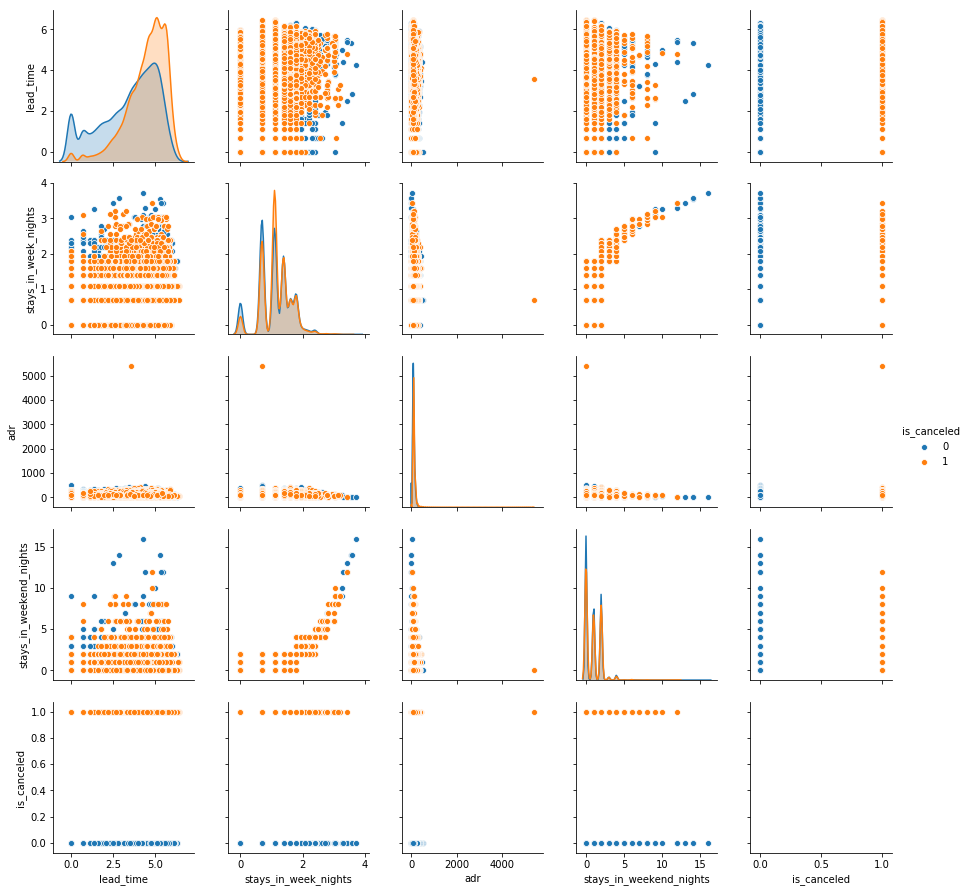

In [79]:
# pair plot
numerical_cols.append("is_canceled")
plt.figure(figsize=(20, 30))
sns.pairplot(df.sample(frac=0.5)[numerical_cols], hue="is_canceled")
plt.show()

I find no significant relationships.